In [4]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf


In [5]:
batch_size = 64
num_classes = 10
epochs = 12

In [6]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data('/home/mnist.npz')

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
optim = tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, decay=0.0)
# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optim,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
938/938 - 7s - 8ms/step - accuracy: 0.8221 - loss: 0.5927 - val_accuracy: 0.9334 - val_loss: 0.2222
Epoch 2/12
938/938 - 6s - 7ms/step - accuracy: 0.9404 - loss: 0.1975 - val_accuracy: 0.9521 - val_loss: 0.1555
Epoch 3/12
938/938 - 7s - 7ms/step - accuracy: 0.9543 - loss: 0.1510 - val_accuracy: 0.9642 - val_loss: 0.1224
Epoch 4/12
938/938 - 6s - 7ms/step - accuracy: 0.9626 - loss: 0.1244 - val_accuracy: 0.9685 - val_loss: 0.1028
Epoch 5/12
938/938 - 11s - 11ms/step - accuracy: 0.9678 - loss: 0.1071 - val_accuracy: 0.9727 - val_loss: 0.0939
Epoch 6/12
938/938 - 10s - 11ms/step - accuracy: 0.9714 - loss: 0.0953 - val_accuracy: 0.9739 - val_loss: 0.0870
Epoch 7/12
938/938 - 7s - 7ms/step - accuracy: 0.9740 - loss: 0.0863 - val_accuracy: 0.9771 - val_loss: 0.0756
Epoch 8/12
938/938 - 7s - 7ms/step - accuracy: 0.9761 - loss: 0.0792 - val_accuracy: 0.9788 - val_loss: 0.0709
Epoch 9/12
938/938 - 7s - 8ms/step 


Training Baseline Model...

Epoch 1/12
938/938 - 7s - 8ms/step - accuracy: 0.8429 - loss: 0.5377 - val_accuracy: 0.9436 - val_loss: 0.1941
Epoch 2/12
938/938 - 10s - 11ms/step - accuracy: 0.9470 - loss: 0.1756 - val_accuracy: 0.9584 - val_loss: 0.1378
Epoch 3/12
938/938 - 10s - 11ms/step - accuracy: 0.9604 - loss: 0.1337 - val_accuracy: 0.9661 - val_loss: 0.1082
Epoch 4/12
938/938 - 6s - 7ms/step - accuracy: 0.9663 - loss: 0.1107 - val_accuracy: 0.9717 - val_loss: 0.0926
Epoch 5/12
938/938 - 10s - 11ms/step - accuracy: 0.9703 - loss: 0.0960 - val_accuracy: 0.9761 - val_loss: 0.0770
Epoch 6/12
938/938 - 10s - 11ms/step - accuracy: 0.9739 - loss: 0.0856 - val_accuracy: 0.9748 - val_loss: 0.0791
Epoch 7/12
938/938 - 10s - 11ms/step - accuracy: 0.9765 - loss: 0.0777 - val_accuracy: 0.9778 - val_loss: 0.0714
Epoch 8/12
938/938 - 10s - 11ms/step - accuracy: 0.9779 - loss: 0.0720 - val_accuracy: 0.9805 - val_loss: 0.0636
Epoch 9/12
938/938 - 7s - 7ms/step - accuracy: 0.9797 - loss: 0.0672 - 

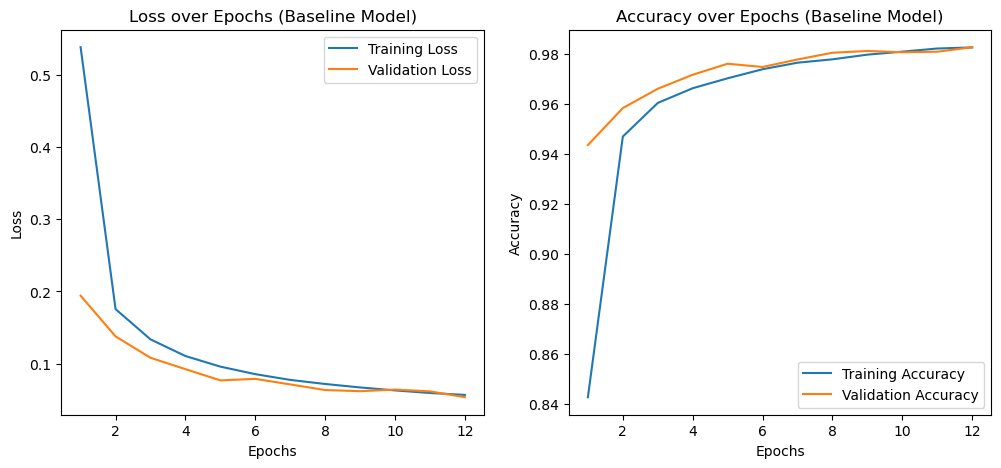

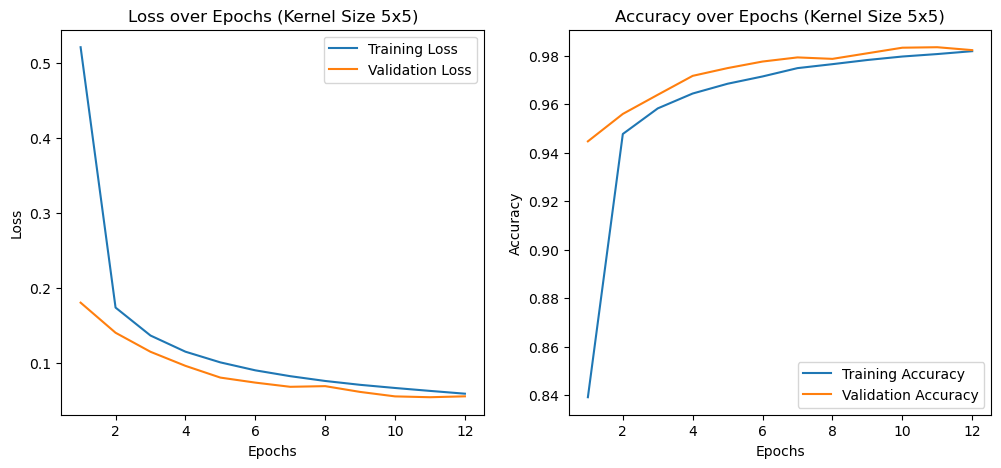

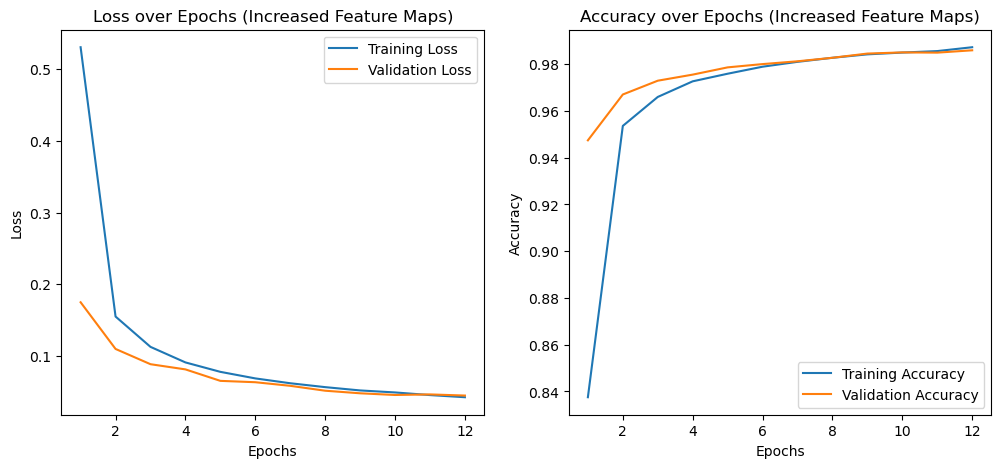

In [7]:
import warnings
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


# Suppress warnings
warnings.filterwarnings("ignore")

# Set parameters
batch_size = 64
num_classes = 10
epochs = 12

# Input image dimensions
img_rows, img_cols = 28, 28

# Load MNIST dataset
mnist_data_path = "/home/mnist.npz"  # Path to your uploaded file
with np.load(mnist_data_path, allow_pickle=True) as f:
    x_train, y_train = f["x_train"], f["y_train"]
    x_test, y_test = f["x_test"], f["y_test"]

# Reshape data based on image format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def build_and_train_model(kernel_size=(3,3), feature_maps=(6,16), description="Baseline Model"):
    """Builds, trains and evaluates a CNN model"""
    print(f"\nTraining {description}...\n")
    model = Sequential()
    model.add(Conv2D(feature_maps[0], kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(feature_maps[1], kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)

    print(f"{description} - Test Loss: {score[0]:.4f} - Test Accuracy: {score[1]:.4f}")
    
    # Plot training & validation loss and accuracy
    epochs_range = range(1, epochs + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title(f'Loss over Epochs ({description})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
    plt.title(f'Accuracy over Epochs ({description})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    
    return score

# Run baseline model
baseline_score = build_and_train_model(kernel_size=(3,3), feature_maps=(6,16), description="Baseline Model")

# Run model with kernel size 5x5
kernel_size_5_score = build_and_train_model(kernel_size=(5,5), feature_maps=(6,16), description="Kernel Size 5x5")

# Run model with increased feature maps
feature_maps_score = build_and_train_model(kernel_size=(3,3), feature_maps=(16,32), description="Increased Feature Maps")

# Summary
print("\nFinal Results Summary:")
print(f"Baseline Model - Test Accuracy: {baseline_score[1]:.4f}")
print(f"Kernel Size 5x5 - Test Accuracy: {kernel_size_5_score[1]:.4f}")
print(f"Increased Feature Maps - Test Accuracy: {feature_maps_score[1]:.4f}")
